In [114]:
import cv2
import numpy as np

import skimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

from scipy import ndimage as ndi

from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt


# Find countours

Original


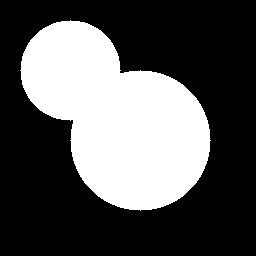

GreyScale


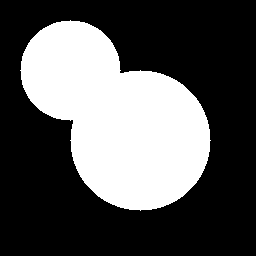

Binary (Otsu Method)


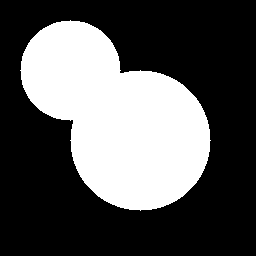

Contour


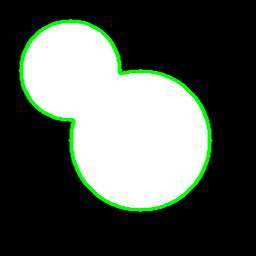

In [20]:
img = cv2.imread("/content/drive/MyDrive/Deep Learning/rough/datasets/circles.png")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, bin_img = cv2.threshold(grey_img, 0, 255, cv2.THRESH_OTSU)

contour_img = img.copy()
contours, hierarchy = cv2.findContours(bin_img, method = cv2.CHAIN_APPROX_NONE, mode = cv2.RETR_TREE)
cv2.drawContours(contour_img, contours = contours, contourIdx = -1, color = (0, 255, 0), thickness = 2, lineType = cv2.LINE_AA)

print("Original")
cv2_imshow(img)

print("GreyScale")
cv2_imshow(grey_img)

print("Binary (Otsu Method)")
cv2_imshow(bin_img)

print("Contour")
cv2_imshow(contour_img)

# Image Segmentation (Watershed Algorithm)

[[140 140]
 [ 70  70]]


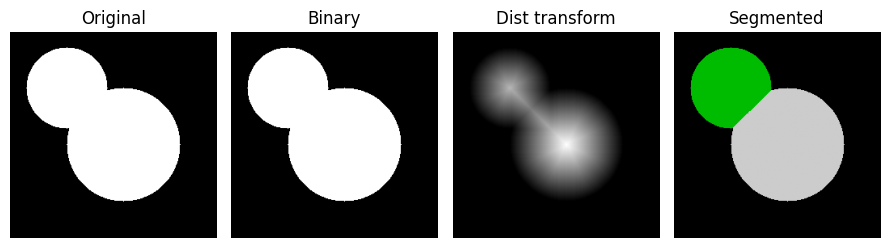

In [175]:
img = cv2.imread("/content/drive/MyDrive/Deep Learning/rough/datasets/circles.png")

# Convert RGB img to BINARY img
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, bin_img = cv2.threshold(grey_img, 0, 255, cv2.THRESH_OTSU)
contour_img = img.copy()

# Calculate distance transform
dist_transform = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)

# Select markers
markers_coords = peak_local_max(dist_transform, min_distance = 1)
print(markers_coords)
markers_bool = np.zeros(dist_transform.shape, dtype = bool)
markers_bool[markers_coords] = True
markers, _ = ndi.label(markers_bool)

# Apply watershed
segmented_img = watershed(255-dist_transform, markers, mask = bin_img)

# Visualize
fig, axes = plt.subplots(1, 4, figsize = (9, 3))
axes[0].imshow(img, cmap = plt.cm.gray)
axes[0].set_title('Original')
axes[1].imshow(grey_img, cmap = plt.cm.gray)
axes[1].set_title('Binary')
axes[2].imshow(dist_transform, cmap = plt.cm.gray)
axes[2].set_title('Dist transform')
axes[3].imshow(segmented_img, cmap = plt.cm.nipy_spectral)
axes[3].set_title('Segmented')

for a in axes:
  a.axis('off')

fig.tight_layout()
plt.show()



In [179]:
cd /content/drive/MyDrive/Deep Learning

/content/drive/MyDrive/Deep Learning


In [182]:
!git clone https://github.com/s-ajaykumar/rough.git

Cloning into 'rough'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 38 (delta 1), reused 2 (delta 0), pack-reused 32 (from 1)
Receiving objects: 100% (38/38), 22.36 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (15/15), done.


In [183]:
!git add .

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
